# La demanda del mercado.
Araceli Castillo, Israel Castillo, Diana Ramírez

Una academia de baile desea saber cuanto pagarían los alumnos dependiendo de la cantidad de disciplinas que tomen. Para investigar, se hace unase realizó una encuesta a diferentes alumnos de la academia  que hayan asistido a clases en algunas de las academias que se consideran competencia. Se les preguntó cuánto estarían dispuestos a pagar al mes por una disciplina, dos, tres, etc. 

Con esta encuesta, la ecuación diferencial que mejor se ajusta a los datos obtenidos es la siguiente:
$$ \frac{dp}{dc}=-.22*p+5,$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

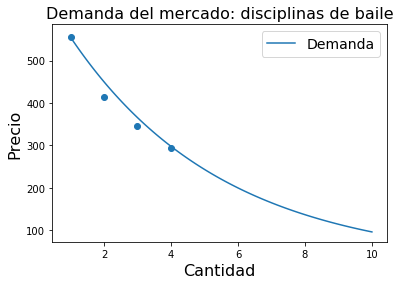

In [2]:
def ecuacion(p,t):
    return -.22*p+5
t=np.linspace(1,10,100)
x0=555
resultado=(odeint(ecuacion, x0,t))
plt.plot(t,resultado,'-',label='Demanda')
xdata = np.array([1,2,3,4])
ydata=np.array([555,415,346.66,293.75])
plt.scatter(xdata,ydata)
plt.legend(loc='upper right',prop={'size': 14})
plt.xlabel('Cantidad',fontsize = 16)
plt.ylabel('Precio',fontsize = 16)
plt.title('Demanda del mercado: disciplinas de baile',fontsize = 16)
plt.show()

### Para hacer una comparación, se presenta la gráfica obtenida junto con una regresión lineal logarítmica con un coeficiente de determinación ($r^2$) de .99

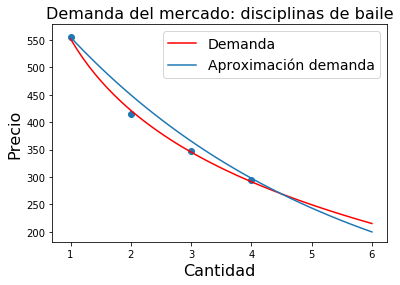

In [3]:
def ecuacion(p,t):
    return -.22*p+5
t=np.linspace(1,6,100)
x0=555
resultado=(odeint(ecuacion, x0,t))
r=np.linspace(1,6)
x=-187.9*np.log(r)+551.92
plt.plot(r,x,'r',label='Demanda')
plt.plot(t,resultado,'-',label='Aproximación demanda')
xdata = np.array([1,2,3,4])
ydata=np.array([555,415,346.66,293.75])
plt.scatter(xdata,ydata)
plt.legend(loc='upper right',prop={'size': 14})
plt.xlabel('Cantidad',fontsize = 16)
plt.ylabel('Precio',fontsize = 16)
plt.title('Demanda del mercado: disciplinas de baile',fontsize = 16)
plt.show()

### Gráfica comparando lo que los alumnos estarían dispuestos a pagar y lo que la academia cobra actualmente

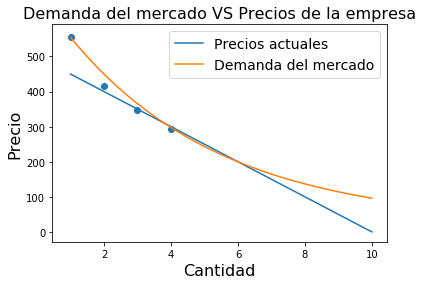

In [4]:
def ecuacion(p,t):
    return -.22*p+5
t=np.linspace(1,10,100)
x0=555
resultado=(odeint(ecuacion, x0,t))
m=np.linspace(1,10,100)
x=500-50*m
plt.plot(m,x,label='Precios actuales')
plt.plot(t,resultado,'-',label='Demanda del mercado')
xdata = np.array([1,2,3,4])
ydata=np.array([555,415,346.66,293.75])
plt.scatter(xdata,ydata)
plt.legend(loc='upper right',prop={'size': 14})
plt.xlabel('Cantidad',fontsize = 16)
plt.ylabel('Precio',fontsize = 16)
plt.title('Demanda del mercado VS Precios de la empresa',fontsize = 16)
plt.show()

**2DA PARTE**

<function matplotlib.pyplot.show>

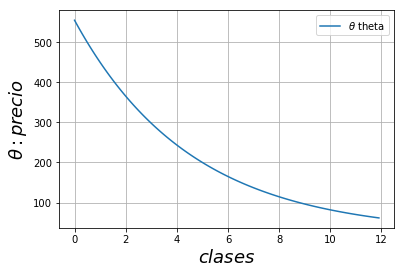

In [29]:
from pykalman import KalmanFilter
def ecuacion(p,t):
    return -.22*p+5
x0=555
xprima=10
t=np.arange(0,12,.1)
y=odeint(ecuacion,x0,t)
plt.plot(t,y[:,0])
plt.grid()
plt.xlabel('$clases$', fontsize=18)
plt.ylabel(r'$\theta: precio$',fontsize=18)
plt.legend([r'$\theta$ theta',r'$\dot{\theta}$ thetaPrima'])
plt.show

La gráfica muestra la demanda del mercado a la que la empresa se enfrenta gracias a la zona en la que la academia se encuentra.

<function matplotlib.pyplot.show>

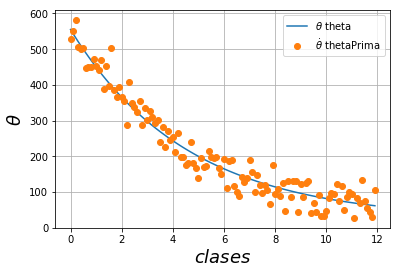

In [28]:
yactual=y[:,0]+np.random.normal(0,30,len(y))
plt.plot(t,y[:,0])
plt.plot(t,yactual,'o')
plt.grid()
plt.xlabel('$clases$', fontsize=18)
plt.ylabel(r'$\theta$',fontsize=18)
plt.legend([r'$\theta$ theta',r'$\dot{\theta}$ thetaPrima'])
plt.show

Con datos aleatorios, se busca asemejar los datos a la demanda, se puede modificar para obsevar que entre más intentos aleatorios, tienden a ser más parecidos a la semanda, y visualmente se muestran con menor rango de error.

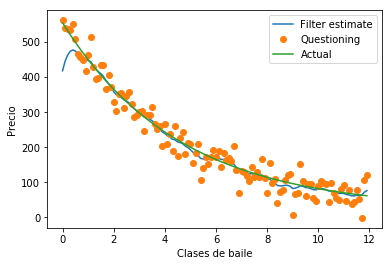

In [27]:
tau=3
kf=KalmanFilter(transition_matrices=[1],
                observation_matrices=[1],
                initial_state_mean=0,
                initial_state_covariance=1,
                observation_covariance=1,
                transition_covariance=.1)
sim=yactual
state_means,state_covss=kf.smooth(sim)
plt.plot(t,state_means[:,0])
plt.plot(t,sim,'o')
plt.plot(t,y[:,0])
plt.legend(['Filter estimate','Questioning','Actual'])
plt.xlabel('Clases de baile')
plt.ylabel('Precio')

Utilizando el filtro Kilman, se asemeja aun más la función utilizando los valores de x, como se puede observar, con el filtro de Kalman, que utiliza la predicción y corrección, la tendencia es muy parecida a la demanda real del mercado.

# Proyecto final: Dieta

**Una persona quiere hacer una dieta durante una semana. Tiene dos opciones de las cuales tiene que elegir considerando los costos finales de cada una.**

Opción 1: Dieta de la papaya, sandia y el melón. Quiere consumir durante la semana 2000 calorias diarias para que durante la dieta no cunsuma menos de las calorias mínimas, y bajando su ingesta diaria de calorias.

papaya - 3 kg   - 43 por 100 gramos - 1290 calorias

melon - 1.5 kg  - 34 por 100 gramos - 510 calorias

sandia - 4 kg   - 30 por 100 gramos - 1200 calorias

La dieta consiste en:

Lunes, Martes y Miércoles: Desayuno, comida y cena :melón

Jueves y Viernes: Desayuno, comida y cena :sandía

Sábado y Domingo: Desayuno, comida y cena :papaya

In [2]:
from pulp import *

In [20]:
prob = LpProblem("Dieta",LpMinimize)
LpVariable("example", None, 100)
LpVariable("example", upBound = 100)
x1=LpVariable("Papaya",0,None,LpInteger)
x2=LpVariable("Melon",0)
x3=LpVariable("Sandia",0)
prob += 1290*x1+510*x2+1200*x3
prob += 1290*x1 >= 2000, "papayaRequirement"
prob += 510*x2 >= 2000, "melonRequirement"
prob += 1200*x3 >= 2000, "sandiaRequirement"
prob.writeLP("dieta.lp")
prob.solve()
print ("Status:", LpStatus[prob.status])

Status: Optimal


In [16]:
for v in prob.variables():
    print (v.name, "=", v.varValue)

Melon = 3.9215686
Papaya = 2.0
Sandia = 1.6666667


**Opción 2: La segunda dieta consiste en consumir manzanas, piña y kiwi**

manzana - 200 gramos   - 52 por 100 gramos - 104 calorias

piña - 2 kg  - 50 por 100 gramos - 1000 calorias

kiwi - 100 gramos   - 61 por 100 gramos - 61 calorias

La dieta consiste en:

Lunes, Martes y Miércoles: Desayuno, comida y cena :manzana

Jueves y Viernes: Desayuno, comida y cena :piña

Sábado y Domingo: Desayuno, comida y cena :kiwi

In [21]:
prob = LpProblem("Dieta",LpMinimize)
LpVariable("example", None, 100)
LpVariable("example", upBound = 100)
x1=LpVariable("manzana",0,None,LpInteger)
x2=LpVariable("piña",0)
x3=LpVariable("kiwi",0)
prob += 104*x1+1000*x2+61*x3
prob += 104*x1 >= 2000, "papayaRequirement"
prob += 1000*x2 >= 2000, "melonRequirement"
prob += 61*x3 >= 2000, "sandiaRequirement"
prob.writeLP("dieta.lp")
prob.solve()
print ("Status:", LpStatus[prob.status])

Status: Optimal


In [22]:
for v in prob.variables():
    print (v.name, "=", v.varValue)

kiwi = 32.786885
manzana = 20.0
piña = 2.0


In [23]:
Opcion1=3.92*1.5*15 + 3*2*20 + 1.66*4*10
Opcion2= 32.7/10*63 + 20/5*22 + 2*2
print ("En la dieta 1 se gasta: ",Opcion1," pesos")
print ("En la dieta 2 se gasta: ",Opcion2," pesos")

En la dieta 1 se gasta:  274.59999999999997  pesos
En la dieta 2 se gasta:  298.01  pesos


La diferencia en realidad no es mucha, pero si se consideran los rpecios, la persona debe elegir hacer la dieta 1